## Project #4 - Artificial neuron network regression

**Noa Finkenhagen and Andreas Faye Werner**

## Abstract

...

## Introduction

In this project we will look at ANN (Artificial Neural Networks) and use these to make a model that will predict Vp. We will start by finding the best combination of attributes using the Relu transfer function and the RMSprop optimizer. After that the best combination of attributes will be used to find the best combination of transfer functions and optimizers. This will optimal combination will be used to calculate C0, and we will see how good this predict the true C0.

...

## Tasks

In [265]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from itertools import product

In [266]:
# Import dataset
df = pd.read_excel("LogDataProject_Cleaned_OutliersRemoved.xlsx")
df.head()

,Vs,DEN,NEU,Vp
0,1.676857,2.3767,0.2759,3.045533
1,1.677172,2.2101,0.2524,2.974779
2,1.676252,2.1419,0.2591,2.881411
3,1.677030,2.1660,0.2589,2.930981
4,1.684534,2.1193,0.2596,2.910094


In [267]:
TargetVariable = ['Vp']
Predictors = [['Vs'],['DEN'],['NEU'],['Vs', 'DEN'],['Vs', 'NEU'],['DEN', 'NEU'],['Vs', 'DEN', 'NEU']]

#### First we will find the best combination of features using the RMSprop optimizer and the relu transfer function

In [295]:
histories = []
models = []
X_test_scaled = []
y_test_scaled = []
target_var_scalers = []

for predictor in Predictors:
    X = df[predictor].values
    y = df[TargetVariable].values
    
    # Standardize the data
    PredictorScaler = StandardScaler()
    TargetVarScaler = StandardScaler()

    PredictorScalerFit = PredictorScaler.fit(X)
    TargetVarScalerFit = TargetVarScaler.fit(y)

    target_var_scalers.append(TargetVarScalerFit)

    X = PredictorScalerFit.transform(X)
    y = TargetVarScalerFit.transform(y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

    # Append the test data to the lists
    X_test_scaled.append(X_test)
    y_test_scaled.append(y_test)

    # Create an artificial neural network model
    model = Sequential()

    # Input layer, Dense fully connect the nodes
    model.add(Dense(units = 5, input_dim = len(predictor), kernel_initializer = 'normal', activation = 'relu'))

    # Hidden layer
    model.add(Dense(units = 5, kernel_initializer = 'normal', activation = 'relu'))

    # Output layer
    model.add(Dense(1, kernel_initializer = 'normal'))

    # Compile the model
    model.compile(loss = 'mean_squared_error', optimizer = 'RMSprop')

    # Train the model and capture the training history
    history = model.fit(X_train, y_train, batch_size = 32, epochs = 300, verbose = 0)
    
    # Append the history and model to the lists
    histories.append(history)
    models.append(model)


In [296]:
# Calculate R2 scores
r2_scores = []

for i in range(len(models)):
    # Get scaled predictions
    Prediction = models[i].predict(X_test_scaled[i])

    # Unscale the predictions
    Prediction = target_var_scalers[i].inverse_transform(Prediction)

    # Get unscaled test data
    y_test_unscaled = target_var_scalers[i].inverse_transform(y_test_scaled[i])

    # Calculate R2 scores
    r2_scores.append(r2_score(y_test_unscaled, Prediction))

10/10 [==============================] - 0s 881us/step


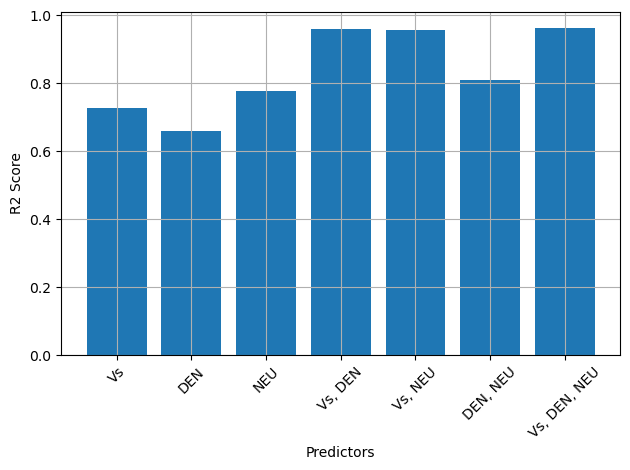

In [297]:
# Make it into a numpy array to plot
r2_scores = np.array(r2_scores)

# Create an array of indices for x-axis positions
x_positions = np.arange(len(Predictors))

plt.bar(x_positions, r2_scores.flatten())

# Set x-axis labels
plt.xticks(ticks=x_positions, labels=[', '.join(sublist) for sublist in Predictors], rotation=45)

plt.xlabel('Predictors')
plt.ylabel('R2 Score')
plt.tight_layout()
plt.grid()
plt.show()

**Comment** 
From this we can see that the model using Vs, DEN and NEU is the best model, having the highest R2 score. We will use this model to find the best optimizer and transfer function.

In [205]:
# Create a list of the different transfer functions and optimizers to try
Transfer_functions = ['relu', 'LeakyReLU', 'swish']
Optimizers = ['RMSprop', 'Adam']
predictor = ['Vs', 'DEN', 'NEU']

In [308]:
histories_Vs_DEN_NEU = []
models_Vs_DEN_NEU = []
target_var_scalers_Vs_DEN_NEU = []
X_test_scaled_Vs_DEN_NEU = []
y_test_scaled_Vs_DEN_NEU = []

for i in range(len(Transfer_functions)):
    for j in range(len(Optimizers)):
        X = df[predictor].values
        y = df[TargetVariable].values
        
        # Standardize the data
        PredictorScaler = StandardScaler()
        TargetVarScaler = StandardScaler()

        PredictorScalerFit = PredictorScaler.fit(X)
        TargetVarScalerFit = TargetVarScaler.fit(y)

        target_var_scalers_Vs_DEN_NEU.append(TargetVarScalerFit)

        X = PredictorScalerFit.transform(X)
        y = TargetVarScalerFit.transform(y)

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

        # Append the test data to the lists
        X_test_scaled_Vs_DEN_NEU.append(X_test)
        y_test_scaled_Vs_DEN_NEU.append(y_test)
        
        # Create an artificial neural network model
        model = Sequential()

        # Input layer, Dense fully connect the nodes
        model.add(Dense(units = 5, input_dim = len(predictor), kernel_initializer = 'normal', activation = Transfer_functions[i]))

        # Hidden layer
        model.add(Dense(units = 5, kernel_initializer = 'normal', activation = Transfer_functions[i]))

        # Output layer
        model.add(Dense(1, kernel_initializer = 'normal'))

        # Compile the model
        model.compile(loss = 'mean_squared_error', optimizer = Optimizers[j])

        # Train the model and capture the training history
        history = model.fit(X_train, y_train, batch_size = 32, epochs = 500, verbose = 0)
        
        # Append the history and model to the lists
        histories_Vs_DEN_NEU.append(history)
        models_Vs_DEN_NEU.append(model)


In [314]:
# Calculate R2 scores
r2_scores_Vs_DEN_NEU = []
y_test_unscaled_Vs_DEN_NEU = []
prediction_unscaled_Vs_DEN_NEU = []

for i in range(len(models_Vs_DEN_NEU)):
    # Get scaled predictions
    Prediction = models_Vs_DEN_NEU[i].predict(X_test_scaled_Vs_DEN_NEU[i])

    # Unscale the predictions
    Prediction = target_var_scalers_Vs_DEN_NEU[i].inverse_transform(Prediction)
    prediction_unscaled_Vs_DEN_NEU.append(Prediction)


    # Get unscaled test data
    y_test_unscaled = target_var_scalers_Vs_DEN_NEU[i].inverse_transform(y_test_scaled_Vs_DEN_NEU[i])
    y_test_unscaled_Vs_DEN_NEU.append(y_test_unscaled)

    # Calculate R2 scores
    r2_scores_Vs_DEN_NEU.append(r2_score(y_test_unscaled, Prediction))

10/10 [==============================] - 0s 830us/step


In [315]:
combinations = [f'{tf}-{opt}' for tf, opt in product(Transfer_functions, Optimizers)]

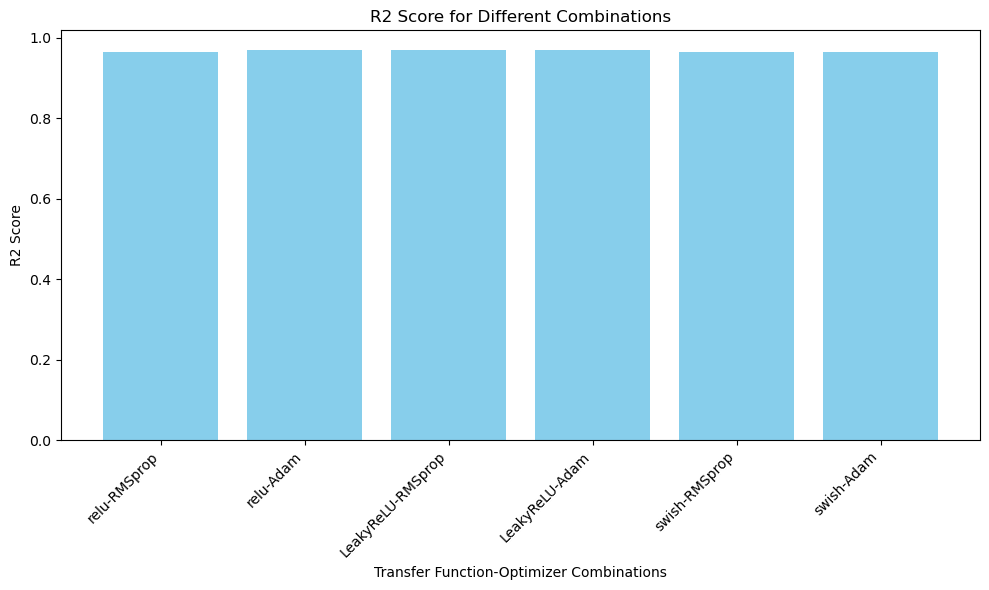

In [316]:
# Plotting the R2 scores
plt.figure(figsize=(10, 6))
plt.bar(combinations, r2_scores_Vs_DEN_NEU, color='skyblue')
plt.xlabel('Transfer Function-Optimizer Combinations')
plt.ylabel('R2 Score')
plt.title('R2 Score for Different Combinations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [317]:
print(r2_scores_Vs_DEN_NEU)

[0.9653212541867483, 0.970169051783281, 0.9689289248238515, 0.96884962795494, 0.9658333157064596, 0.9660275709829036]


#### Calculating Uniaxial Compressive Strenght With The Best Model

**Comment**
The model using the transfer function relu and the optimizer Adam got the best R2 score of 0.97; We will use this to calculate the Uniaxial Compressive Strenght (C0)

In [168]:
def C0(Vp):
    return 0.77 * (Vp**2.92)

In [318]:
Vp_true = np.array(y_test_unscaled_Vs_DEN_NEU[1])
Vp_pred = np.array(prediction_unscaled_Vs_DEN_NEU[1])

In [321]:
C0_true = C0(Vp_true)
C0_pred = C0(Vp_pred)

# Calculate the R2
r2_score(C0_true, C0_pred)

0.9650315867111999

**Comment** Our model using all the features and the transfer function Relu and optimizer Adam has a R2 score of 0.965 that means it catches 96.5 % of the variance in the data, which is a very good model.

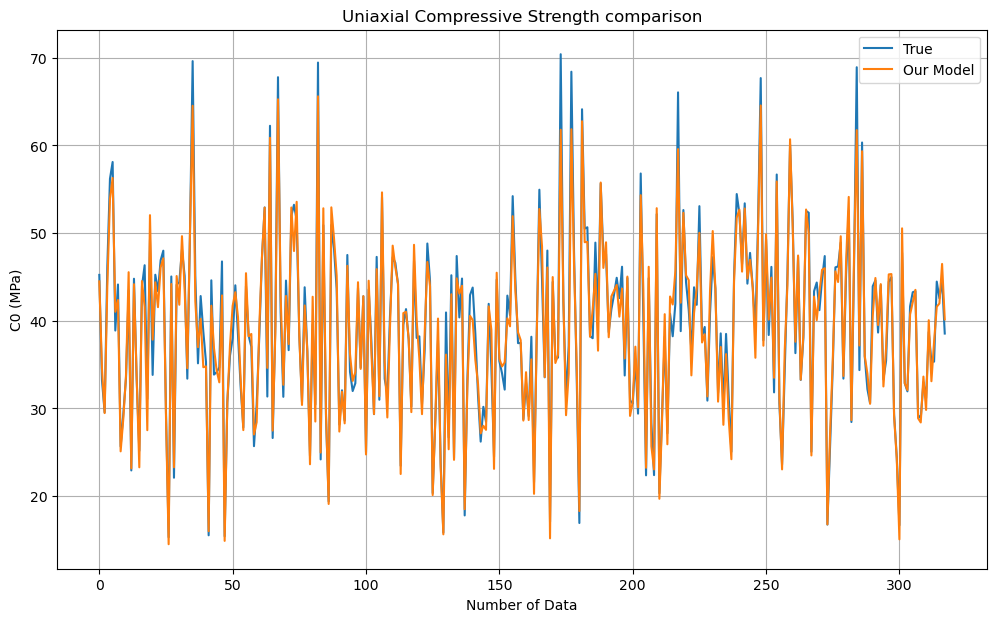

In [320]:
# Plot
plt.figure(figsize=(12,7))
plt.plot(C0_true)
plt.plot(C0_pred)
plt.xlabel("Number of Data")
plt.ylabel("C0 (MPa)")
plt.title("Uniaxial Compressive Strength comparison")
plt.legend(['True','Our Model'])
plt.grid()
plt.show()

## Discussion and conclusion

...

## Reflections

...

## References

...